In [1]:
import rasterio
import os, glob
import numpy as np
from rasterio.plot import show
import geopandas as gpd
import rasterio.mask
import rtree
import pandas as pd
from shapely import speedups
speedups.disable()

['D:\\practice_data\\Raster_Pratice\\R10m\\T43QBB_20200118T054151_B02_10m.jp2', 'D:\\practice_data\\Raster_Pratice\\R10m\\T43QBB_20200118T054151_B03_10m.jp2', 'D:\\practice_data\\Raster_Pratice\\R10m\\T43QBB_20200118T054151_B04_10m.jp2', 'D:\\practice_data\\Raster_Pratice\\R10m\\T43QBB_20200118T054151_B08_10m.jp2']


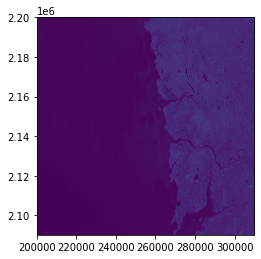

EPSG:32643
(10980, 10980)


In [2]:
# Set the path
path = "D:\practice_data\Raster_Pratice\R10m/"


# Search and List all files
search_criteria = "*.jp2"
q = os.path.join(path, search_criteria)
dem_fps = glob.glob(q)

# Print all listed files
print(dem_fps)

# Read Raster
red = rasterio.open(path + "T43QBB_20200118T054151_B04_10m.jp2",
driver="JP2OpenJPEG")
nir = rasterio.open(path + "T43QBB_20200118T054151_B08_10m.jp2")

# Plot single band
show((nir), cmap='viridis')
# Print Crs
print(nir.crs)
# Know dimensions
print(nir.shape)


In [3]:
shp = gpd.read_file("D:\practice_data\Raster_Pratice\AOI.shp")

# Clip and write raster (nir)
image, trans = rasterio.mask.mask(nir, shp.envelope, crop=True)
meta = nir.meta
print(meta)

{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32643), 'transform': Affine(10.0, 0.0, 199980.0,
       0.0, -10.0, 2200020.0)}


In [4]:
meta.update({"driver": "GTiff",
 "height": image.shape[1],
 "width": image.shape[2],
 "transform": trans})

In [5]:
with rasterio.open("D:\practice_data\Raster_Pratice/nir_masked.tif",
"w", **meta) as dest:
 dest.write(image)
image1, trans = rasterio.mask.mask(red, shp.envelope, crop=True)
meta = red.meta
meta.update({"driver": "GTiff",
 "height": image.shape[1],
 "width": image.shape[2],
 "transform": trans})

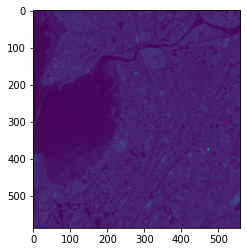

In [6]:
with rasterio.open("D:\practice_data\Raster_Pratice/red_masked.tif",
"w", **meta) as dest:
 dest.write(image1)
show(image)

for fp in dem_fps:
 img = rasterio.open(fp)

# For loop for clip
for fp in dem_fps:
 img = rasterio.open(fp)
 shp = gpd.read_file("D:\practice_data\Raster_Pratice\AOI.shp")
 image, trans = rasterio.mask.mask(img, shp.envelope, crop=True)
 meta = img.meta
 meta.update({"driver": "GTiff",
 "height": image.shape[1],
 "width": image.shape[2],
 "transform": trans})
 with rasterio.open("D:\practice_data\Raster_Pratice/" + fp[86:93] +
".tif", "w", **meta) as dest:
  dest.write(image)
nir_clip = rasterio.open("D:\practice_data\Raster_Pratice/nir_masked.tif")
red_clip = rasterio.open("D:\practice_data\Raster_Pratice/red_masked.tif")
# show((nir_clip))
# show((red_clip))

c:\users\win8\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
c:\users\win8\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


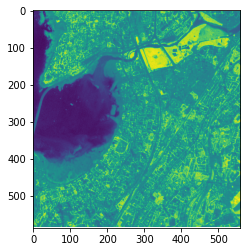

<AxesSubplot:>

In [7]:
nir_arr = nir_clip.read(1)
red_arr = red_clip.read(1)

# Check NDVI
NDVI = (nir_arr - red_arr) / (nir_arr + red_arr)
# print(NDVI)
nir_arr = nir_clip.read(1).astype('float64')
red_arr = red_clip.read(1).astype('float64')
NDVI = ((nir_arr - red_arr) / (nir_arr + red_arr))
show(NDVI)

In [8]:
# Copy profile
profile = nir_clip.profile.copy()
profile['dtype'] = 'float64'
with rasterio.open("D:\practice_data\Raster_Pratice/NDVI_masked_float.tif",
"w", **profile) as dest: \
   dest.write_band(1, NDVI)
    
# Calculate Green Area in hectares
# Extract green area pixel
green = NDVI[NDVI > 0.2]

area = ((len(green)*100)/10000)
# print(green)
print('Green area (vegetation):', area, 'hecatares')

Green area (vegetation): 1299.35 hecatares
